<a href="https://colab.research.google.com/github/AgarwalMayank2/Face_Detection/blob/KNN_Tavishi/applying_ML_algorithms/KNN_PRMLproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# mount google drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# Reading CNN features

In [3]:
url_filtered_CNN_features_dataset = 'https://raw.githubusercontent.com/AgarwalMayank2/Face_Detection/refs/heads/main/processed_dataset/filtered_CNN_features_dataset.csv' #for CNN limited
df_cnn = pd.read_csv(url_filtered_CNN_features_dataset) # reading url for extracted CNN_features_dataset_limited.csv

In [4]:
df_cnn.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0,0.266585,1.337187,1.352905,0.100848,1.880685,0.059888,2.773605,0.115643,0.138749,...,0.039434,0.071662,0.733759,1.643910,0.041306,1.488236,0.048181,0.247783,0.300232,Paul_Bremer
1,1,0.355948,0.750634,0.909794,0.188214,0.680066,0.221442,3.089571,0.342022,0.087186,...,0.093867,0.089694,0.859610,1.764073,0.250430,1.133540,0.004091,0.153542,0.236034,Paul_Bremer
2,2,0.267111,1.015316,1.154480,0.131544,1.066389,0.024949,3.701925,0.145037,0.082419,...,0.080086,0.089589,0.663708,1.854499,0.078751,1.240009,0.065222,0.105058,0.227633,Paul_Bremer
3,3,0.260295,0.882900,0.885955,0.106698,2.663052,0.057836,1.854394,0.209269,0.103750,...,0.181255,0.182038,0.397535,1.222931,0.007285,0.878194,0.016247,0.110492,0.129523,Paul_Bremer
4,4,0.347203,0.623839,0.817085,0.212599,1.026321,0.176634,2.486715,0.426571,0.345026,...,0.267895,0.136346,0.713298,0.978184,0.059828,1.008205,0.042905,0.028597,0.199120,Paul_Bremer
5,5,0.354952,0.935169,1.313525,0.161971,0.743334,0.075382,2.913061,0.339807,0.038969,...,0.042886,0.094991,0.731441,1.846496,0.061113,0.960774,0.152283,0.094486,0.294108,Paul_Bremer
6,6,0.491479,1.098953,0.935011,0.099713,0.859047,0.125197,2.448608,0.194795,0.171454,...,0.197234,0.036094,0.552411,1.532099,0.195461,0.562803,0.054066,0.242185,0.097366,Paul_Bremer
7,7,0.076298,1.872830,1.156564,0.151697,1.786531,0.004271,2.473813,0.183758,0.190911,...,0.025632,0.110004,0.524370,1.041115,0.171625,1.456280,0.096045,0.074930,0.214463,Paul_Bremer
8,8,0.443961,1.489843,1.034748,0.054299,1.201338,0.475425,3.003049,0.170383,0.172904,...,0.170266,0.155772,1.335769,1.501814,0.096764,1.345042,0.470579,0.327874,0.116694,Paul_Bremer
9,9,0.265048,1.558320,0.774199,0.302818,0.905585,0.152244,2.703004,0.314053,0.539273,...,0.076195,0.142454,0.670869,1.724953,0.110348,1.263562,0.008221,0.099455,0.174265,Paul_Bremer


# Train/Test split - for CNN dataset

In [5]:
# Separate features and labels
X_cnn = df_cnn.iloc[:, :-1]
y_cnn = df_cnn.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_cnn)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split (16 training, 4 testing per class)
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_cnn = scaler.fit_transform(X_train_cnn)
X_test_cnn = scaler.transform(X_test_cnn)

print(f"Dataset size: {df_cnn.shape}")
print(f"Training size: {X_train_cnn.shape}, Testing size: {X_test_cnn.shape}")

Dataset size: (4324, 2050)
Training size: (3459, 2049), Testing size: (865, 2049)


In [ ]:
print(y_train_cnn[:10])

[ 36 134 146   6  41  23  61  28 134  53]


# Reading HoG features

In [ ]:
url_filtered_HoG_features_dataset="C:/Users/tavis/Downloads/filtered_HOG_features_dataset.csv"
df_hog=pd.read_csv(url_filtered_HoG_features_dataset)

In [ ]:
df_hog.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,70299,70300,70301,70302,70303,70304,70305,70306,70307,70308
0,0,0.147622,0.000000,0.010496,0.01048,0.030300,0.008548,0.005577,0.006585,0.021226,...,0.020418,0.009971,0.008646,0.014164,0.049468,0.003930,0.001001,0.006818,0.021222,Tim_Henman
1,1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
2,2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
3,3,0.132761,0.000000,0.000000,0.00000,0.002665,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
4,4,0.202144,0.032098,0.033961,0.02799,0.317099,0.058462,0.033903,0.034219,0.166567,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
5,5,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
6,6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
7,7,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman
8,8,0.026542,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.151645,0.034494,0.074602,0.105946,0.305386,0.050689,0.037455,0.000000,0.018227,Tim_Henman
9,9,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Tim_Henman


# Train/Test split - for HoG dataset

In [ ]:
# Separate features and labels
X_hog = df_hog.iloc[:, :-1]
y_hog = df_hog.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_hog)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split (16 training, 4 testing per class)
X_train_hog, X_test_hog, y_train_hog, y_test_hog = train_test_split(X_hog, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_hog = scaler.fit_transform(X_train_hog)
X_test_hog = scaler.transform(X_test_hog)

print(f"Dataset size: {df_hog.shape}")
print(f"Training size: {X_train_hog.shape}, Testing size: {X_test_hog.shape}")

Dataset size: (4324, 70310)
Training size: (3459, 70309), Testing size: (865, 70309)


# Reading LBP features

In [18]:
url_filtered_lbp_features = 'https://raw.githubusercontent.com/AgarwalMayank2/Face_Detection/refs/heads/main/processed_dataset/filtered_LBP_features_dataset.csv'
df_LBP = pd.read_csv(url_filtered_lbp_features)

In [19]:
df_LBP.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,256
0,0,589.0,57.0,319.0,205.0,67.0,4.0,195.0,466.0,370.0,...,474.0,1924.0,612.0,26.0,357.0,592.0,523.0,328.0,6088.0,Tim_Henman
1,1,1012.0,113.0,383.0,203.0,76.0,11.0,205.0,369.0,505.0,...,591.0,2086.0,681.0,29.0,447.0,699.0,535.0,486.0,13472.0,Tim_Henman
2,2,920.0,92.0,288.0,152.0,107.0,18.0,192.0,403.0,313.0,...,461.0,1812.0,579.0,41.0,428.0,597.0,411.0,374.0,11673.0,Tim_Henman
3,3,1068.0,85.0,447.0,298.0,90.0,11.0,293.0,732.0,546.0,...,727.0,2150.0,650.0,32.0,374.0,564.0,585.0,367.0,5449.0,Tim_Henman
4,4,510.0,43.0,304.0,189.0,47.0,8.0,201.0,387.0,296.0,...,405.0,3263.0,588.0,36.0,307.0,593.0,350.0,328.0,4606.0,Tim_Henman
5,5,678.0,65.0,173.0,131.0,66.0,14.0,114.0,255.0,292.0,...,366.0,2675.0,577.0,43.0,556.0,678.0,313.0,581.0,17998.0,Tim_Henman
6,6,668.0,62.0,344.0,187.0,60.0,10.0,218.0,347.0,330.0,...,510.0,2106.0,678.0,51.0,612.0,660.0,435.0,639.0,13194.0,Tim_Henman
7,7,745.0,74.0,267.0,218.0,80.0,10.0,180.0,363.0,376.0,...,590.0,2008.0,622.0,44.0,417.0,545.0,410.0,380.0,9406.0,Tim_Henman
8,8,428.0,45.0,268.0,222.0,44.0,6.0,210.0,430.0,265.0,...,343.0,1964.0,668.0,35.0,315.0,537.0,433.0,283.0,3225.0,Tim_Henman
9,9,1154.0,103.0,354.0,234.0,113.0,16.0,260.0,374.0,473.0,...,578.0,1488.0,599.0,30.0,396.0,587.0,482.0,399.0,11423.0,Tim_Henman


# Train/Test split - for LBP dataset

In [20]:
# Separate features and labels
X_LBP = df_LBP.iloc[:, :-1]
y_LBP = df_LBP.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_LBP)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split (16 training, 4 testing per class)
X_train_LBP, X_test_LBP, y_train_LBP, y_test_LBP = train_test_split(X_LBP, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_LBP = scaler.fit_transform(X_train_LBP)
X_test_LBP = scaler.transform(X_test_LBP)

print(f"Dataset size: {df_LBP.shape}")
print(f"Training size: {X_train_LBP.shape}, Testing size: {X_test_LBP.shape}")

Dataset size: (4324, 258)
Training size: (3459, 257), Testing size: (865, 257)


In [47]:
train_classes = set(y_train_LBP)
test_classes = set(y_test_LBP)
common_classes = train_classes.intersection(test_classes)
print(f"Common Classes: {len(common_classes)}")

Common Classes: 158


In [7]:
import numpy as np

# Assuming X is your dataset with 257 features
pca = PCA().fit(X_LBP)
explained_variance = np.cumsum(pca.explained_variance_ratio_)  # Cumulative sum of variance

# Find the number of components that retain at least 95% variance
num_components = np.argmax(explained_variance >= 0.95) + 1
print("Number of components to retain 95% variance:", num_components)

Number of components to retain 95% variance: 6


# Applying PCA for dimensionality reduction

In [13]:
from sklearn.decomposition import PCA

# PCA on CNN features

In [55]:
pca=PCA(n_components=1000)

X_train_cnn_pca=pca.fit_transform(X_train_cnn)
X_test_cnn_pca=pca.transform(X_test_cnn)

print(X_train_cnn_pca.shape)
print(X_test_cnn_pca.shape)

(3459, 1000)
(865, 1000)


In [45]:
print(np.sum(pca.explained_variance_ratio_))  # Should be close to 1

0.7648278503926899


# PCA on HoG features

In [ ]:
pca=PCA(n_components=1000)

X_train_hog_pca=pca.fit_transform(X_train_hog)
X_test_hog_pca=pca.transform(X_test_hog)

print(X_train_hog_pca.shape)
print(X_test_hog_pca.shape)

(3459, 1000)
(865, 1000)


# PCA on LBP features

In [54]:
pca=PCA(n_components=200)

X_train_LBP_pca=pca.fit_transform(X_train_LBP)
X_test_LBP_pca=pca.transform(X_test_LBP)

print(X_train_LBP_pca.shape)
print(X_test_LBP_pca.shape)

(3459, 200)
(865, 200)


In [46]:
print(np.sum(pca.explained_variance_ratio_))  # Should be close to 1

0.7648278503926899


# Combining all features

In [15]:
import numpy as np

In [ ]:
X_train_hog_pca = X_train_hog_pca[:, :50]  # Truncate to match CNN PCA
X_train_cnn_pca = X_train_LBP_pca[:, :50]  # Truncate to match

In [ ]:
X_test_hog_pca = X_test_hog_pca[:, :50]  # Truncate to match CNN PCA
X_test_cnn_pca = X_test_LBP_pca[:, :50]  # Truncate to match

In [56]:
combined_X_train = np.concatenate((X_train_cnn_pca, X_train_hog_pca, X_train_LBP_pca), axis=1)
combined_X_test = np.concatenate((X_test_cnn_pca, X_test_hog_pca, X_test_LBP_pca), axis=1)

NameError: name 'X_train_hog_pca' is not defined

# Combination 2

In [57]:
combined_X_train = np.concatenate((X_train_cnn_pca, X_train_LBP_pca), axis=1)
combined_X_test = np.concatenate((X_test_cnn_pca, X_test_LBP_pca), axis=1)

In [58]:
print(X_train_cnn_pca.shape[1] + X_train_LBP_pca.shape[1])
print(X_test_cnn_pca.shape[1]+X_test_LBP_pca.shape[1])

1200
1200


In [59]:
print(combined_X_train.shape[1])
print(combined_X_test.shape[1])

1200
1200


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(combined_X_train)
X_test_scaled = scaler.transform(combined_X_test)

In [61]:
y_train = y_train_cnn
y_test = y_test_cnn

print(y_train[:10])
print(y_test[:10])

[ 36 134 146   6  41  23  61  28 134  53]
[ 91  60 128  35  11 103  50 111  89  80]


In [62]:
combined_X_train.shape

(3459, 1200)

# Check Printing

In [ ]:
# for i in range(X_test_cnn_pca.shape[0]):
#   if i%100==0:
#     print(X_test_cnn_pca[i,:])

In [30]:
for i in range(len(y_test)):
  if i%100==0:
    print(label_encoder.inverse_transform([y_test[i]])[0])

Laura_Bush
Angelina_Jolie
Andre_Agassi
Mike_Weir
Colin_Powell
John_Negroponte
Dick_Cheney
Vladimir_Putin
Gerhard_Schroeder


In [63]:
for i in range(len(y_test)):
  if i<=100:
    print(label_encoder.inverse_transform([y_test[i]])[0])

Laura_Bush
Jean-David_Levitte
Roger_Federer
George_W_Bush
Ariel_Sharon
Michael_Schumacher
Ian_Thorpe
Nicanor_Duarte_Frutos
Kofi_Annan
Joschka_Fischer
George_W_Bush
Roh_Moo-hyun
Jose_Maria_Aznar
Vicente_Fox
George_W_Bush
Taha_Yassin_Ramadan
Mohammed_Al-Douri
George_W_Bush
John_Kerry
Donald_Rumsfeld
Jose_Maria_Aznar
Renee_Zellweger
John_Snow
Ricardo_Lagos
Jeremy_Greenstock
Sergey_Lavrov
George_W_Bush
Hillary_Clinton
John_Snow
Kim_Clijsters
Ariel_Sharon
Kim_Clijsters
Megawati_Sukarnoputri
James_Kelly
Megawati_Sukarnoputri
George_W_Bush
Colin_Powell
Carlos_Menem
Tommy_Franks
Tom_Daschle
Mohammad_Khatami
Nestor_Kirchner
Bill_Clinton
Recep_Tayyip_Erdogan
Bill_McBride
Lindsay_Davenport
Guillermo_Coria
Tony_Blair
Winona_Ryder
Luiz_Inacio_Lula_da_Silva
Colin_Powell
Kofi_Annan
Joschka_Fischer
Vladimir_Putin
George_W_Bush
George_W_Bush
Junichiro_Koizumi
Tony_Blair
Fidel_Castro
Tony_Blair
Laura_Bush
Lance_Armstrong
John_Ashcroft
John_Bolton
Colin_Powell
Colin_Powell
Serena_Williams
Colin_Powell
Ma

# KNN Model

In [33]:
import numpy as np
import math

In [34]:
def euclidean_dist(x,y):
  # x1,y1,z1=x
  # x2,y2,z2=y
  return math.sqrt(sum([(a-b)**2 for a,b in zip(x,y)]))

In [ ]:
point1 = [2,3,4]
point2 = [1,2,1]
print(euclidean_dist(point1, point2))

3.3166247903554


In [75]:
k=1

In [76]:
from collections import Counter

In [ ]:
predictions=[]
for i in range(combined_X_test.shape[0]):
  distances=[]
  nearest_labels=[]
  for j in range(combined_X_train.shape[0]):
    # append the pair (distance, index) to distances
    dist=euclidean_dist(combined_X_test[i], combined_X_train[j])
    distances.append((dist, j))
  # sorting distances on the basis of first item of pair i.e. distance
  distances.sort(key=lambda x:x[0])
  for k1 in range(min(k, len(distances))):  # Ensure k does not exceed available distances
    nearest_labels.append(y_train[distances[k1][1]])

  label_counts = Counter(nearest_labels)
  most_common_label = label_counts.most_common(1)[0][0] if nearest_labels else -1

  predictions.append(label_encoder.inverse_transform([most_common_label])[0])

  if i<=100 or i==300 or i==500 or i==800:
    print(f'Label {i} detected : {predictions[i]}')
    # if most_common_label!=-1:
    #   print(X_test_cnn_pca[i], '\t', label_encoder.inverse_transform([most_common_label])[0])
    # else:
    #   print(X_test_cnn_pca[i], '\t', 'Unknown')

print(predictions)

Label 0 detected : George_W_Bush
Label 1 detected : Paul_Bremer
Label 2 detected : Carlos_Moya
Label 3 detected : Tony_Blair
Label 4 detected : George_W_Bush
Label 5 detected : Hugo_Chavez
Label 6 detected : Serena_Williams
Label 7 detected : Gray_Davis
Label 8 detected : Colin_Powell
Label 9 detected : Junichiro_Koizumi
Label 10 detected : Colin_Powell
Label 11 detected : Mohammed_Al-Douri
Label 12 detected : Jose_Maria_Aznar
Label 13 detected : Paul_Burrell
Label 14 detected : Silvio_Berlusconi
Label 15 detected : Arnold_Schwarzenegger
Label 16 detected : Gonzalo_Sanchez_de_Lozada
Label 17 detected : Jean_Chretien
Label 18 detected : Alejandro_Toledo
Label 19 detected : John_Ashcroft
Label 20 detected : Alejandro_Toledo
Label 21 detected : Julianne_Moore
Label 22 detected : George_W_Bush
Label 23 detected : Ricardo_Lagos
Label 24 detected : Jeremy_Greenstock
Label 25 detected : John_Negroponte
Label 26 detected : Donald_Rumsfeld
Label 27 detected : Michael_Bloomberg
Label 28 detected

In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.00%


In [19]:
predictions=[]
for i in range(X_test_LBP_pca.shape[0]):
  distances=[]
  nearest_labels=[]
  for j in range(X_train_LBP_pca.shape[0]):
    # append the pair (distance, index) to distances
    dist=euclidean_dist(X_test_LBP_pca[i], X_train_LBP_pca[j])
    distances.append((dist, j))
  # sorting distances on the basis of first item of pair i.e. distance
  distances.sort(key=lambda x:x[0])
  for k1 in range(min(k, len(distances))):  # Ensure k does not exceed available distances
    nearest_labels.append(y_train_LBP[distances[k1][1]])

  label_counts = Counter(nearest_labels)
  most_common_label = label_counts.most_common(1)[0][0] if nearest_labels else -1

  predictions.append(label_encoder.inverse_transform([most_common_label])[0])

  if i%100==0:
    print(f'Label {i} detected')
    # if most_common_label!=-1:
    #   print(X_test_cnn_pca[i], '\t', label_encoder.inverse_transform([most_common_label])[0])
    # else:
    #   print(X_test_cnn_pca[i], '\t', 'Unknown')

print(predictions)

Label 0 detected
Label 100 detected
Label 200 detected
Label 300 detected
Label 400 detected
Label 500 detected
Label 600 detected
Label 700 detected
Label 800 detected
['George_W_Bush', 'George_W_Bush', 'Donald_Rumsfeld', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'Tony_Blair', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'Tony_Blair', 'George_W_Bush', 'Colin_Powell', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'Colin_Powell', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'Colin_Powell', 'George_W_Bush', 'Tony_Blair', 'George_W_Bush', 'George_W_Bush', 'George_W_Bush', 'Tony_B

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [65]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)  # You can change random_state for reproducibility

# Train the classifier on training data
clf.fit(X_train_scaled, y_train_LBP)  # Assuming y_train_LBP contains correct labels

DecisionTreeClassifier(random_state=42)

In [66]:
# Predict on test set
y_pred = clf.predict(X_test_scaled)

In [67]:
# Compute accuracy
accuracy = accuracy_score(y_test_LBP, y_pred)  # Assuming y_test_LBP contains true labels
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.11445086705202312


In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Set number of clusters equal to the number of unique classes
n_clusters = len(np.unique(y_train_LBP))  # 158 in your case

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit KMeans on training data
kmeans.fit(combined_X_train)

# Predict clusters for test data
y_pred_kmeans = kmeans.predict(combined_X_test)

# Evaluate clustering (Only if true labels are available)
ari_score = adjusted_rand_score(y_test_LBP, y_pred_kmeans)  # Adjusted Rand Index
print("K-Means Clustering ARI Score:", ari_score)

K-Means Clustering ARI Score: 0.02578126911752812


In [44]:
from sklearn.cluster import AgglomerativeClustering

# Initialize Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit and predict clusters
y_pred_agg = agg_clustering.fit_predict(combined_X_test)

# Evaluate clustering performance
ari_score_agg = adjusted_rand_score(y_test_LBP, y_pred_agg)
print("Agglomerative Clustering ARI Score:", ari_score_agg)

Agglomerative Clustering ARI Score: 0.028853368686636627


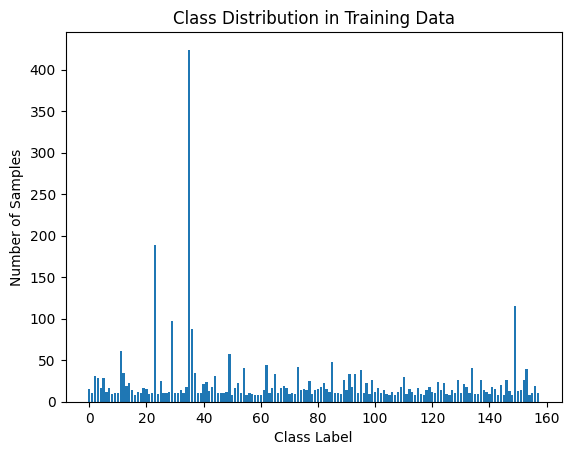

In [53]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(y_train_LBP, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Data")
plt.show()

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=500)
clf.fit(X_train_scaled, y_train_LBP)
y_pred = clf.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test_LBP, y_pred))

Logistic Regression Accuracy: 0.5699421965317919


In [71]:
import math
from sklearn.neighbors import KNeighborsClassifier

k = int(math.sqrt(len(y_train_LBP)))  # sqrt(3459) ≈ 59
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

knn.fit(X_train_scaled, y_train_LBP)
y_pred_knn = knn.predict(X_test_scaled)

print("Tuned KNN Accuracy:", accuracy_score(y_test_LBP, y_pred_knn))

Tuned KNN Accuracy: 0.12716763005780346


In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train_scaled, y_train_LBP)

KNeighborsClassifier(metric='manhattan')

In [73]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test_LBP, y_pred)

print(f'KNN Accuracy: {accuracy:.4f}')

KNN Accuracy: 0.1480


In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test_LBP, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.08      0.25      0.12         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         3
          11       0.43      0.19      0.26        16
          12       0.20      0.12      0.15         8
          13       1.00      0.20      0.33         5
          14       0.08      0.17      0.11         6
          15       0.07      0.33      0.12         3
          16       0.00      0.00      0.00         2
          17       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
